In [443]:
!python -V
from PIL import Image
import numpy as np
from math import *
import os
os.sys.path
import string
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage import rotate
# from scipy import signal as sg


#%matplotlib inline
#plt.style.use('dark_background')

Access is denied.


In [444]:
###QXGA 4D SLM Parameters
# slm_w = 2048
# slm_h = 1536
# px = 8.2e-6

#Meadowlark 1920x1200 SLM  1920x1152
slm_height = int(1152) 
slm_width = int(1920)


px_size = 9.2e-3
bit = 8 #bit
bit_depth= 2**bit-1
intensity = 144#95

#Configuring Parameters for Grating
duty_cycle=50.0
my_period=10
n=5  #shift number


In [445]:
def crop_SLM(input, img_h,img_w):
    h,w = input.shape
    if img_h<h and  img_w < w:
        center_h = h/2
        center_w = w/2
        offx = img_w/2
        offy = img_h/2
        crop = input[int(center_h-offy):int(center_h+offy),int(center_w-offx):int(center_w+offx)]
    else:
        print("crop dim are bigger than input")
    return crop

def binary_grating(slm_height=1920,slm_width=1152,period=10,duty_cycle=0.5,shift=0,num_shifts=5,angle=0,bit_depth=intensity):
    #Making this bigger to crop after rotations
    padding_factor = 2 #Ideally more than the diagonal
    slm_h_pad =slm_height*padding_factor 
    slm_w_pad =slm_width *padding_factor
    shift=np.floor(period/num_shifts)*shift
    cycle=(slm_w_pad)/period
    t= np.arange(0,cycle*period,1)
    square1D = (((t+shift)%period<(period*duty_cycle))*bit_depth)#.astype(np.uint8)
    square2D = (np.tile(square1D,(slm_h_pad,1)))#.astype(np.uint8)
    rot_square2D = rotate(square2D,angle,reshape=False)
    crop_square2D = crop_SLM(rot_square2D,slm_height,slm_width)
    return crop_square2D

#TODO: Need to make a better function to shift the images
# def binary_grating_fast(slm_height=1920,slm_width=1154,period=10,duty_cycle=0.5,shift=0,num_shifts=5,angle=0,bit_depth=255):
#     gratings =[]
#     #Making this bigger to crop after rotations
#     padding_factor = 3 #Ideally more than the diagonal
#     slm_h_pad =slm_height*padding_factor 
#     slm_w_pad =slm_width *padding_factor
#     shift=np.floor(period/num_shifts)*shift
#     cycle=(slm_w_pad)/period
#     t= np.arange(0,cycle*period,1)
#     square1D = ((t+shift)%period<(period*duty_cycle))*bit_depth
#     square2D = np.tile(square1D,(slm_h_pad,1))
#     for rot in range(3):
#         rot_angle=angle+60*rot
#         rot_square2D = rotate(square2D,rot_angle,reshape=False)
#         crop_square2D = crop_SLM(rot_square2D,slm_height,slm_width)
#         gratings.append(crop_square2D)
#     gratings =np.array(gratings)
#     return gratings



In [446]:
# Define Folder path for saving
# GitIgnores the files saved in /test_gratings folder
path = r'C:\Users\Titan\Documents\abajor\New10PixPatternBinary'
folder_name = '12pix 3 angles start at 10'
saving_folder = os.path.join(path,folder_name)
init_angle = 10  # rotate 60 from starting point
rotations = 3
rot_ang_deg = 60
phase_cnt = 3
#waffle = any#np.zeros([slm_height, slm_width], dtype = np.uint8)

if not(os.path.isdir(saving_folder)):
  os.makedirs(saving_folder)

waffle = binary_grating(slm_height,slm_width,period = my_period,shift=0, num_shifts = phase_cnt, angle=0)
# waffle2 = binary_grating(slm_height,slm_width,period = my_period,shift=0, num_shifts = phase_cnt, angle=1)
# waffle3 = binary_grating(slm_height,slm_width,period = my_period,shift=0, num_shifts = phase_cnt, angle=2)
# waffle_sum = waffle + waffle2 + waffle3

# plt.figure()
# plt.imshow(waffle_sum)

for angle in range(rotations):
  for phases in range(phase_cnt):
    rot_angle = rot_ang_deg*angle+init_angle
    grating =binary_grating(slm_height,slm_width,period = my_period,shift=phases, num_shifts = phase_cnt, angle=rot_angle)
    #grating =binary_grating(slm_height,slm_width,period = my_period,shift=phases*my_period/phase_cnt, angle=rot_angle)
    grat_name = str(bit)+'bit_'+str(rot_angle).zfill(3)+'deg_phase'+str(phases).zfill(3)+'.bmp'
    save_file= os.path.join(saving_folder,grat_name)
    cv2.imwrite(save_file,grating)
    #print('grating' + ' ' + str(angle) + ' ' + str(phases))

    '''code for waffle fries'''

    # if(phases == 0 and angle > 0):
    #   waffle = waffle + grating
    #   if(angle == 2):
        
    #     min = np.min(waffle)
    #     phase_val = 105
    #     waffle = waffle - min
    #     waffle = waffle.clip(None, phase_val)
    #     # max = np.max(waffle)
    #     # waffle = (waffle/max)*phase_val
    #     waffle_name = 'init_angle_' + str(init_angle) + '_val_' + str(phase_val) + '_waffle.bmp'
    #     save_file = os.path.join(saving_folder, waffle_name)
    #     cv2.imwrite(save_file, waffle)
    #     plt.figure()
    #     plt.imshow(waffle, cmap='gray')




## Testing Grounds
Proceed with caution

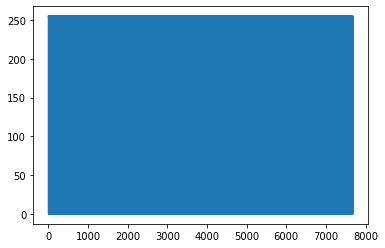

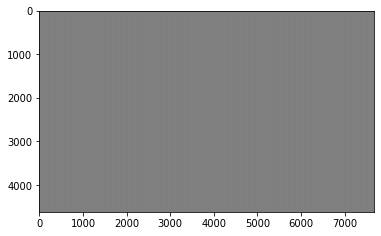

In [447]:
###QXGA 4D SLM Parameters
# slm_w = 2048
# slm_h = 1536
# px = 8.2e-6

#Meadowlark 1920x1200 SLM
padding_factor = 4
slm_height = 1154 #Making this bigger to crop after rotations
slm_width = 1920

slm_h_pad =slm_height*padding_factor 
slm_w_pad =slm_width *padding_factor
# slm_height = 48 #Making this bigger to crop after rotations
# slm_width = 56

px_size = 9.2e-3
bit_depth= 2**8-1

#Configuring Parameters for Grating
duty_cycle=50.0
period=6
n=0  #shift number
shift=np.floor(period/5)*n
cycle=(slm_w_pad)/period
t= np.arange(0,cycle*period,1)
square1D = ((t+shift)%period<(period*duty_cycle/100))*bit_depth
square2D = np.tile(square1D,(slm_h_pad,1))

plt.figure()
plt.plot(square1D)
plt.figure()
plt.imshow(square2D, cmap='gray')

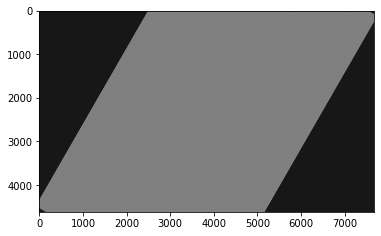

In [448]:
square2D_60deg = rotate(square2D,60,reshape=False)
plt.figure()
plt.imshow(square2D_60deg, cmap='gray')

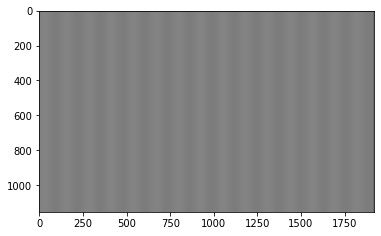

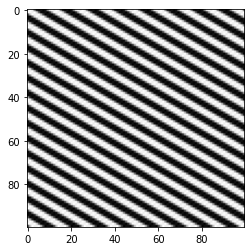

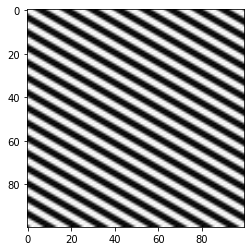

In [449]:
center_h = slm_h_pad/2
center_w = slm_w_pad/2
offx = center_w/4
offy = center_h/4
crop = square2D[int(center_h-offy):int(center_h+offy),int(center_w-offx):int(center_w+offx)]
crop_60 = square2D_60deg[int(center_h-offy):int(center_h+offy),int(center_w-offx):int(center_w+offx)]
plt.figure()
plt.imshow(crop,cmap='gray')
plt.figure()
plt.imshow(crop_60[0:100,0:100],cmap='gray')
plt.figure()
plt.imshow(crop_60[0:100,0:100], interpolation='bilinear',cmap='gray')


In [450]:
def crop_SLM(input, img_h,img_w):
    h,w = input.shape
    if img_h<h and  img_w < w:
        center_h = h/2
        center_w = w/2
        offx = img_w/2
        offy = img_h/2
        crop = input[int(center_h-offy):int(center_h+offy),int(center_w-offx):int(center_w+offx)]
        print(center_h)
        print(offx)
    else:
        print("crop dim are bigger than input")
    return crop

2308.0
960.0


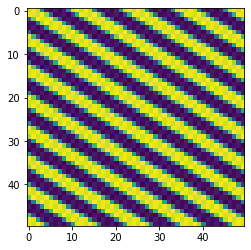

In [451]:
a = crop_SLM(square2D_60deg,slm_height,slm_width)
plt.figure()
plt.imshow(a[0:50,0:50])

In [452]:
# Define Folder path for saving
# folder = 'C:/Users/yoshi/Documents/edhirata/M25/SIM/'
folder = 'C:/Users/Titan/Documents/ed/SIM/gratings/'

try:
    os.makedirs(folder)
except OSError:
    print('Folder already exists.')
    

Folder already exists.


In [453]:
angles = np.array(range(0,180,60))
im_rotated = np.zeros((slm_width,slm_height,len(angles)))

In [454]:
# im = Image.fromarray(img.astype(np.uint8))
# im_rotated = im.rotate(angles[2],expand = 1)
# crop_rectangle = ((slm_w+padding)/2-slm_w/2,(slm_h+padding)/2-slm_h/2,(slm_w+padding)/2+slm_w/2,(slm_h+padding)/2+slm_h/2)
# im_rot_crop= im_rotated.crop(crop_rectangle)

# plt.figure()
# plt.imshow(im_rot_crop)

In [455]:
#img = np.tile(pwm,(slm_height+padding,1))*bit
#im = Image.fromarray(img.astype(np.uint8))
#print(img.shape)

# rotate images 0, 60, 120 degrees, crop to correct dimensions and save
#for i,angle in enumerate(angles):
    # rotate the file
#    im_rotated = im.rotate(angle,expand = 1)
#    crop_rectangle = ((slm_width+padding)/2-slm_width/2,(slm_height+padding)/2-slm_height/2,(slm_width+padding)/2+slm_width/2,(slm_height+padding)/2+slm_height/2)
#    im_rot_crop= im_rotated.crop(crop_rectangle)
    # im_rotated = im.array(im_rot_crop)

    #save the file
#    filename = folder + str(duty_cycle) +'cycle_' + str(angle) + 'deg'+ '.bmp'
    # save as 8bit file
#    im_rot_crop.save(filename)


In [456]:
plt.figure(figsize =(10,10))

crop_region= (0,0,50,50)
crop_img = im.crop(crop_region)
plt.imshow(abs(np.fft.fftshift(np.fft.fft2(crop_img))))


NameError: name 'im' is not defined

<Figure size 720x720 with 0 Axes>

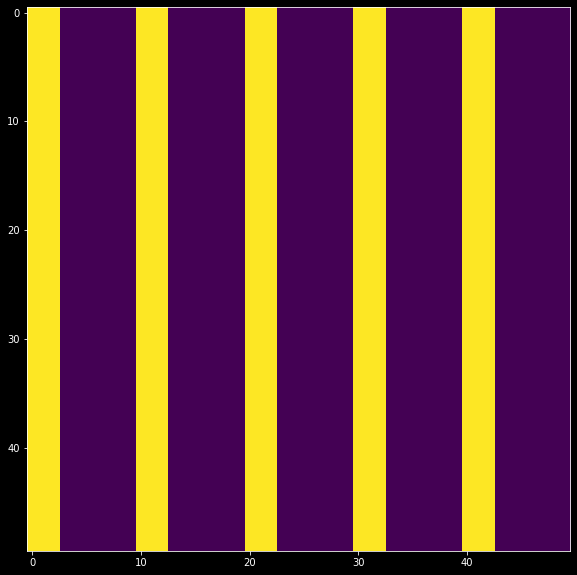

In [ ]:
im = Image.fromarray(img.astype(np.uint8))
crop_region= (0,0,50,50)
crop_img = im.crop(crop_region)
plt.figure(figsize=(10,10))
plt.imshow(crop_img)